Taken from https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/ for my Big Data class.

# Statistical Imputation for Missing Values in Machine Learning

Datasets may have missing values, and this can cause problems for many machine learning algorithms.

As such, it is good practice to identify and replace missing values for each column in your input data prior to modeling your prediction task. This is called missing data imputation, or imputing for short.

A popular approach for data imputation is to calculate a statistical value for each column (such as a mean) and replace all missing values for that column with the statistic. It is a popular approach because the statistic is easy to calculate using the training dataset and because it often results in good performance.

In this tutorial, you will discover how to use statistical imputation strategies for missing data in machine learning.

After completing this tutorial, you will know:

* Missing values must be marked with NaN values and can be replaced with statistical measures to calculate the column of values.
* How to load a CSV value with missing values and mark the missing values with NaN values and report the number and percentage of missing values for each column.
* How to impute missing values with statistics as a data preparation method when evaluating models and when fitting a final model to make predictions on new data.

**Kick-start your project** with my new book Data Preparation for Machine Learning, including step-by-step tutorials and the Python source code files for all examples.

Let’s get started.

Updated Jun/2020: Changed the column used for prediction in examples.

## Tutorial Overview
This tutorial is divided into three parts; they are:

1. Statistical Imputation
2. Horse Colic Dataset
3. Statistical Imputation With SimpleImputer
  1. SimpleImputer Data Transform
  2. SimpleImputer and Model Evaluation
  3. Comparing Different Imputed Statistics
  4. SimpleImputer Transform When Making a Prediction

## Statistical Imputation
A dataset may have missing values.

These are rows of data where one or more values or columns in that row are not present. The values may be missing completely or they may be marked with a special character or value, such as a question mark “?”.

> These values can be expressed in many ways. I’ve seen them show up as nothing at all […], an empty string […], the explicit string NULL or undefined or N/A or NaN, and the number 0, among others. No matter how they appear in your dataset, knowing what to expect and checking to make sure the data matches that expectation will reduce problems as you start to use the data.

— Page 10, Bad Data Handbook, 2012.

Values could be missing for many reasons, often specific to the problem domain, and might include reasons such as corrupt measurements or data unavailability.

> They may occur for a number of reasons, such as malfunctioning measurement equipment, changes in experimental design during data collection, and collation of several similar but not identical datasets.

— Page 63, Data Mining: Practical Machine Learning Tools and Techniques, 2016.

Most machine learning algorithms require numeric input values, and a value to be present for each row and column in a dataset. As such, missing values can cause problems for machine learning algorithms.

As such, it is common to identify missing values in a dataset and replace them with a numeric value. This is called data imputing, or missing data imputation.

A simple and popular approach to data imputation involves using statistical methods to estimate a value for a column from those values that are present, then replace all missing values in the column with the calculated statistic.

It is simple because statistics are fast to calculate and it is popular because it often proves very effective.

Common statistics calculated include:

* The column mean value.
* The column median value.
* The column mode value.
* A constant value.

Now that we are familiar with statistical methods for missing value imputation, let’s take a look at a dataset with missing values.

## Horse Colic Dataset
The horse colic dataset describes medical characteristics of horses with colic and whether they lived or died.

There are 300 rows and 26 input variables with one output variable. It is a binary classification prediction task that involves predicting 1 if the horse lived and 2 if the horse died.

There are many fields we could select to predict in this dataset. In this case, we will predict whether the problem was surgical or not (column index 23), making it a binary classification problem.

The dataset has numerous missing values for many of the columns where each missing value is marked with a question mark character (“?”).

Below provides an example of rows from the dataset with marked missing values.

In [ ]:
2,1,530101,38.50,66,28,3,3,?,2,5,4,4,?,?,?,3,5,45.00,8.40,?,?,2,2,11300,00000,00000,2
1,1,534817,39.2,88,20,?,?,4,1,3,4,2,?,?,?,4,2,50,85,2,2,3,2,02208,00000,00000,2
2,1,530334,38.30,40,24,1,1,3,1,3,3,1,?,?,?,1,1,33.00,6.70,?,?,1,2,00000,00000,00000,1
1,9,5290409,39.10,164,84,4,1,6,2,2,4,4,1,2,5.00,3,?,48.00,7.20,3,5.30,2,1,02208,00000,00000,1
...

You can learn more about the dataset here:

* Horse Colic Dataset
* Horse Colic Dataset Description

No need to download the dataset as we will download it automatically in the worked examples.

Marking missing values with a NaN (not a number) value in a loaded dataset using Python is a best practice.

We can load the dataset using the read_csv() Pandas function and specify the “na_values” to load values of ‘?‘ as missing, marked with a NaN value.



In [ ]:
...
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')

Once loaded, we can review the loaded data to confirm that “?” values are marked as NaN.

In [ ]:
...
# summarize the first few rows
print(dataframe.head())

We can then enumerate each column and report the number of rows with missing values for the column.

In [ ]:
...
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
	# count number of rows with missing values
	n_miss = dataframe[[i]].isnull().sum()
	perc = n_miss / dataframe.shape[0] * 100
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

Tying this together, the complete example of loading and summarizing the dataset is listed below.

In [1]:
# summarize the horse colic dataset
from pandas import read_csv
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# summarize the first few rows
print(dataframe.head())
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
	# count number of rows with missing values
	n_miss = dataframe[[i]].isnull().sum()
	perc = n_miss / dataframe.shape[0] * 100
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, M

Running the example first loads the dataset and summarizes the first five rows.

We can see that the missing values that were marked with a “?” character have been replaced with NaN values.

Next, we can see the list of all columns in the dataset and the number and percentage of missing values.

We can see that some columns (e.g. column indexes 1 and 2) have no missing values and other columns (e.g. column indexes 15 and 21) have many or even a majority of missing values.

Now that we are familiar with the horse colic dataset that has missing values, let’s look at how we can use statistical imputation.

## Statistical Imputation With SimpleImputer
The scikit-learn machine learning library provides the SimpleImputer class that supports statistical imputation.

In this section, we will explore how to effectively use the SimpleImputer class.

### SimpleImputer Data Transform
The SimpleImputer is a data transform that is first configured based on the type of statistic to calculate for each column, e.g. mean.

In [ ]:
...
# define imputer
imputer = SimpleImputer(strategy='mean')

Then the imputer is fit on a dataset to calculate the statistic for each column.

In [ ]:
...
# fit on the dataset
imputer.fit(X)

The fit imputer is then applied to a dataset to create a copy of the dataset with all missing values for each column replaced with a statistic value.

In [ ]:
...
# transform the dataset
Xtrans = imputer.transform(X)

We can demonstrate its usage on the horse colic dataset and confirm it works by summarizing the total number of missing values in the dataset before and after the transform.

The complete example is listed below.

In [2]:
# statistical imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = SimpleImputer(strategy='mean')
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


Running the example first loads the dataset and reports the total number of missing values in the dataset as 1,605.

The transform is configured, fit, and performed and the resulting new dataset has no missing values, confirming it was performed as we expected.

Each missing value was replaced with the mean value of its column.

## SimpleImputer and Model Evaluation
It is a good practice to evaluate machine learning models on a dataset using k-fold cross-validation.

To correctly apply statistical missing data imputation and avoid data leakage, it is required that the statistics calculated for each column are calculated on the training dataset only, then applied to the train and test sets for each fold in the dataset.

> If we are using resampling to select tuning parameter values or to estimate performance, the imputation should be incorporated within the resampling.

— Page 42, Applied Predictive Modeling, 2013.

This can be achieved by creating a modeling pipeline where the first step is the statistical imputation, then the second step is the model. This can be achieved using the Pipeline class.

For example, the Pipeline below uses a SimpleImputer with a ‘mean‘ strategy, followed by a random forest model.

In [ ]:
...
# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

We can evaluate the mean-imputed dataset and random forest modeling pipeline for the horse colic dataset with repeated 10-fold cross-validation.

The complete example is listed below.

In [3]:
# evaluate mean imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.859 (0.055)


Running the example correctly applies data imputation to each fold of the cross-validation procedure.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The pipeline is evaluated using three repeats of 10-fold cross-validation and reports the mean classification accuracy on the dataset as about 86.3 percent, which is a good score.

## Comparing Different Imputed Statistics
How do we know that using a ‘mean‘ statistical strategy is good or best for this dataset?

The answer is that we don’t and that it was chosen arbitrarily.

We can design an experiment to test each statistical strategy and discover what works best for this dataset, comparing the mean, median, mode (most frequent), and constant (0) strategies. The mean accuracy of each approach can then be compared.

The complete example is listed below.

>mean 0.858 (0.062)
>median 0.863 (0.057)
>most_frequent 0.869 (0.053)
>constant 0.878 (0.050)


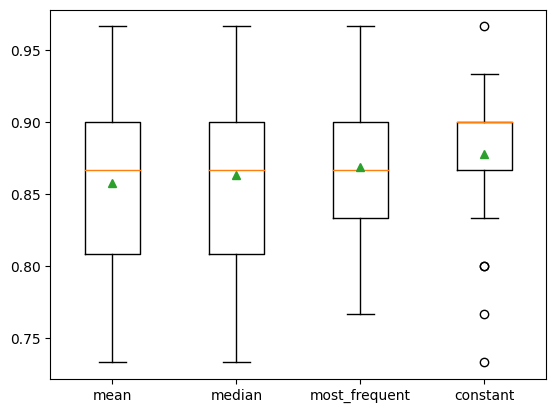

In [4]:
# compare statistical imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

Running the example evaluates each statistical imputation strategy on the horse colic dataset using repeated cross-validation.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The mean accuracy of each strategy is reported along the way. The results suggest that using a constant value, e.g. 0, results in the best performance of about 88.1 percent, which is an outstanding result.

At the end of the run, a box and whisker plot is created for each set of results, allowing the distribution of results to be compared.

We can clearly see that the distribution of accuracy scores for the constant strategy is better than the other strategies.

## SimpleImputer Transform When Making a Prediction
We may wish to create a final modeling pipeline with the constant imputation strategy and random forest algorithm, then make a prediction for new data.

This can be achieved by defining the pipeline and fitting it on all available data, then calling the predict() function passing new data in as an argument.

Importantly, the row of new data must mark any missing values using the NaN value.

In [ ]:
...
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]

The complete example is listed below.

In [5]:
# constant imputation strategy and prediction for the hose colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# create the modeling pipeline
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), ('m', RandomForestClassifier())])
# fit the model
pipeline.fit(X, y)
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]
# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


Running the example fits the modeling pipeline on all available data.

A new row of data is defined with missing values marked with NaNs and a classification prediction is made.

## Further Reading
This section provides more resources on the topic if you are looking to go deeper.

## Related Tutorials
* Results for Standard Classification and Regression Machine Learning Datasets
* How to Handle Missing Data with Python

## Books
* Bad Data Handbook, 2012.
* Data Mining: Practical Machine Learning Tools and Techniques, 2016.
* Applied Predictive Modeling, 2013.

## APIs
* Imputation of missing values, scikit-learn Documentation.
* sklearn.impute.SimpleImputer API.

## Dataset
* Horse Colic Dataset
* Horse Colic Dataset Description

# Summary
In this tutorial, you discovered how to use statistical imputation strategies for missing data in machine learning.

Specifically, you learned:

* Missing values must be marked with NaN values and can be replaced with statistical measures to calculate the column of values.
* How to load a CSV value with missing values and mark the missing values with NaN values and report the number and percentage of missing values for each column.
* How to impute missing values with statistics as a data preparation method when evaluating models and when fitting a final model to make predictions on new data.

#### Do you have any questions?
Ask your questions in the comments below and I will do my best to answer.





Taken from https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/ for my Big Data class.